In [2]:
%pip install tweepy

  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
clean-fid 0.1.22 requires requests==2.25.1, but you have requests 2.27.1 which is incompatible.


In [3]:
import tweepy
import configparser
import matplotlib.pyplot as plt
import math
import requests
from PIL import Image
import io

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')
tokens = config['Tokens']
client = tweepy.Client(
  bearer_token=tokens['BearerToken'],
  consumer_key=tokens['ConsumerKey'],
  consumer_secret=tokens['ConsumerSecret'],
  access_token=tokens['AccessToken'],
  access_token_secret=tokens['AccessTokenSecret'],
)

In [9]:
user_fields = ['id', 'username', 'profile_image_url']
users = client.get_users(usernames=['dril', 'ByYourLogic'], user_fields=user_fields).data
following = {}
profile_pic_urls = {}
for user in users:
  profile_pic_urls[user] = user.profile_image_url
  following_users = client.get_users_following(user.id, max_results=1000, user_fields=user_fields).data
  following[user.username] = set([following_user.username for following_user in following_users])
  for following_user in following_users:
    profile_pic_urls[following_user.username] = following_user.profile_image_url

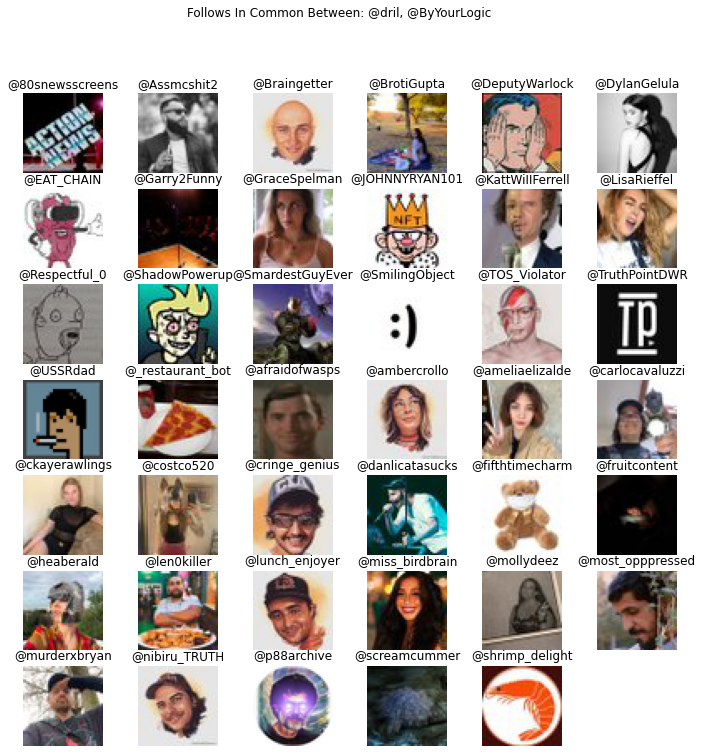

In [11]:
follows_in_common = set()
for user, follows in following.items():
  if len(follows_in_common) == 0:
    follows_in_common = follows
  else:
    follows_in_common = follows_in_common.intersection(follows)
follows_in_common = sorted(list(follows_in_common))

users_str = ', '.join([f'@{user.username}' for user in users])
rows = math.ceil(len(follows_in_common) / 6)
fig = plt.figure(figsize=(12, 12))
fig.suptitle(f'Follows In Common Between: {users_str}')
for i, user in enumerate(follows_in_common):
  result = requests.get(profile_pic_urls[user])
  image = Image.open(io.BytesIO(result.content))
  plt.subplot(rows, 6, i + 1)
  plt.title(f'@{user}')
  plt.axis('off')
  plt.imshow(image)